## Scikit-learn LinearRegression vs Numpy Polyfit

In [1]:
import numpy as np
import scipy as sp
x = [9, 28, 38, 58, 88, 98, 108, 118, 128, 138, 148, 158, 168, 178, 188, 198, 208, 218, 228, 238, 278, 288, 298]
y = [51, 80, 112, 294, 286, 110, 59, 70, 56, 70, 104, 59, 59, 72, 87, 99, 64, 60, 74, 151, 157, 57, 83]

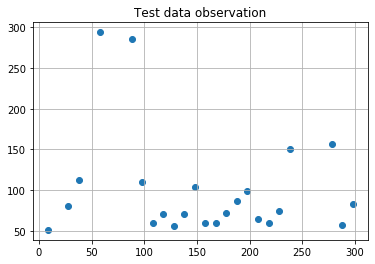

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.title("Test data observation")
plt.grid()
plt.show()

In [3]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

## Numpy.polyfit

In [4]:
fx = np.linspace(min(x), max(x), 100) # x-axis data points
f1 = np.polyfit(x, y, 1)
f2 = np.polyfit(x, y, 2)
f3 = np.polyfit(x, y, 3)
f4 = np.polyfit(x, y, 4)

In [5]:
print(f1)
print(f2)
print(f3)
print(f4)

[ -0.1605313  125.77023172]
[ 7.97183228e-04 -4.07809516e-01  1.39787684e+02]
[ 3.89638135e-05 -1.74165800e-02  1.88213131e+00  7.84214050e+01]
[-1.07313899e-06  7.02970734e-04 -1.50591781e-01  1.13179608e+01
 -7.54496044e+01]


Coefficients: [-0.1605313]
Intercept: 125.77023172322039
Error: 92743.77449407903


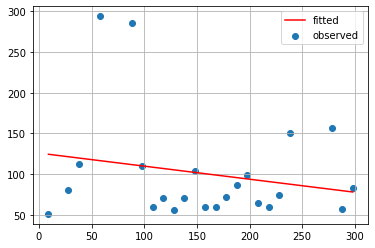

Coefficients: [ 0.00079718 -0.40780952]
Intercept: 139.7876843734297
Error: 92025.81182290475


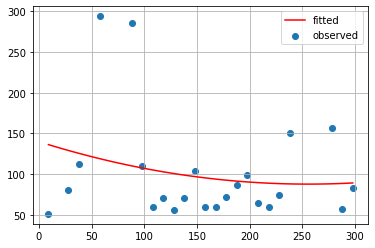

Coefficients: [ 3.89638135e-05 -1.74165800e-02  1.88213131e+00]
Intercept: 78.4214049819388
Error: 82768.48920722329


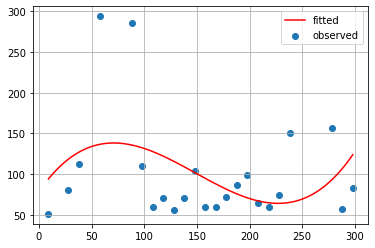

Coefficients: [-1.07313899e-06  7.02970734e-04 -1.50591781e-01  1.13179608e+01]
Intercept: -75.44960440261413
Error: 51070.95819968556


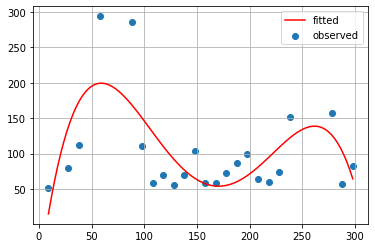

In [6]:
for coefs in [f1, f2, f3, f4]:
    f = np.poly1d(coefs)
    print('Coefficients: {}'.format(coefs[:-1]))
    print('Intercept: {}'.format(coefs[-1]))
    print('Error: {}'.format(error(f, x, y)))

    fitted_curve = np.poly1d(coefs)(fx)
    plt.scatter(x, y, label="observed")
    plt.plot(fx, fitted_curve, c="red", label="fitted")
    plt.grid()
    plt.legend()
    plt.show()

## Scikit-learn.LinearRegression

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [8]:
poly1d = PolynomialFeatures(degree=1)
X1 = poly1d.fit_transform(np.array(x).reshape(-1, 1))
linear_reg_1d = LinearRegression()
linear_reg_1d.fit(X1, y)
print(linear_reg_1d.coef_[1:])
print(linear_reg_1d.intercept_)
print(np.linalg.norm(y - linear_reg_1d.predict(X1)) ** 2)

[-0.1605313]
125.77023172322043
92743.77449407903


In [9]:
poly2d = PolynomialFeatures(degree=2)
X2 = poly2d.fit_transform(np.array(x).reshape(-1, 1))
linear_reg_2d = LinearRegression()
linear_reg_2d.fit(X2, y)
print(linear_reg_2d.coef_[1:])
print(linear_reg_2d.intercept_)
print(np.linalg.norm(y - linear_reg_2d.predict(X2)) ** 2)

[-0.40780952  0.00079718]
139.78768437342626
92025.81182290474


In [10]:
poly3d = PolynomialFeatures(degree=3)
X3 = poly3d.fit_transform(np.array(x).reshape(-1, 1))
linear_reg_3d = LinearRegression()
linear_reg_3d.fit(X3, y)
print(linear_reg_3d.coef_[1:])
print(linear_reg_3d.intercept_)
print(np.linalg.norm(y - linear_reg_3d.predict(X3)) ** 2)

[ 1.88213131e+00 -1.74165800e-02  3.89638135e-05]
78.42140498235423
82768.4892072233


In [11]:
poly4d = PolynomialFeatures(degree=4)
X4 = poly4d.fit_transform(np.array(x).reshape(-1, 1))
linear_reg_4d = LinearRegression()
linear_reg_4d.fit(X4, y)
print(linear_reg_4d.coef_[1:])
print(linear_reg_4d.intercept_)
print(np.linalg.norm(y - linear_reg_4d.predict(X4)) ** 2)

[ 1.13179615e+01 -1.50591791e-01  7.02970776e-04 -1.07313906e-06]
-75.44961766310675
51070.958199685454


In [12]:
def regression_line(model, coefs, intercept, X_):
    print('Coefficients: {}'.format(coefs))
    print('Intercept: {}'.format(intercept))
    print('Error: {}'.format(np.linalg.norm(y - model.predict(X_)) ** 2))

    plt.scatter(x, y, label="observed")
    plt.plot(x, model.predict(X_), c='red', label="fitted")
    plt.grid()
    plt.legend()
    plt.show()

Coefficients: [-0.1605313]
Intercept: 125.77023172322043
Error: 92743.77449407903


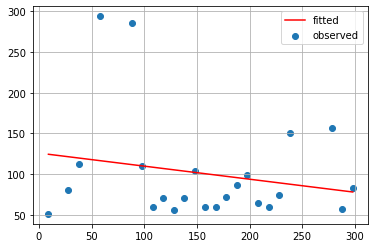

In [13]:
regression_line(linear_reg_1d, linear_reg_1d.coef_[1:], linear_reg_1d.intercept_, X1)

Coefficients: [-0.40780952  0.00079718]
Intercept: 139.78768437342626
Error: 92025.81182290474


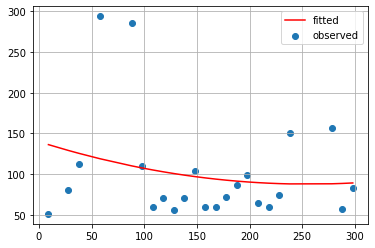

In [14]:
regression_line(linear_reg_2d, linear_reg_2d.coef_[1:], linear_reg_2d.intercept_, X2)

Coefficients: [ 1.88213131e+00 -1.74165800e-02  3.89638135e-05]
Intercept: 78.42140498235423
Error: 82768.4892072233


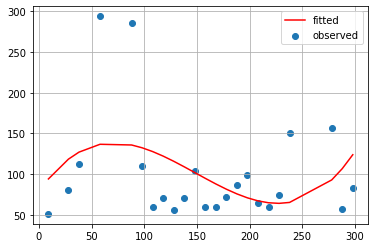

In [15]:
regression_line(linear_reg_3d, linear_reg_3d.coef_[1:], linear_reg_3d.intercept_, X3)

Coefficients: [ 1.13179615e+01 -1.50591791e-01  7.02970776e-04 -1.07313906e-06]
Intercept: -75.44961766310675
Error: 51070.958199685454


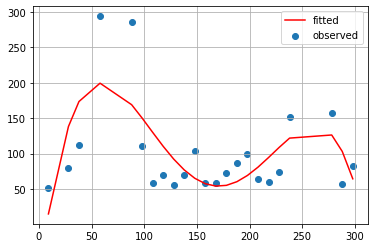

In [16]:
regression_line(linear_reg_4d, linear_reg_4d.coef_[1:], linear_reg_4d.intercept_, X4)